#**Informações**

**Definição do problema:** Com o objetivo de prever os valores dos imóveis com base em características específicas, esse projeto é interessante para compreender melhor quais são as motivações (características de peso) para aumento dos valores de imóveis. A partir ele tem peso para vendedores e compradores que gostariam de compreender o valor de um imóvel que gostaria de vender ou o comprador que tem a intenção de uma imóvel até certo valor.

**Objetivo:** Tendo em isso em mente desenvolverei um modelo machine learning que possa prever esses valores com base nas características adicionadas.

- Entendimento do negócio.
- Entendimento dos dados.
- Preparação dos dados (Limpar e transformar).
- Analisar os dados.
- Modelagem.
    - Comparar os algoritmos de machine learning e selecionar o melhor
    - Treinar esse modelo ajustando hiper parâmetros
    - Avaliar o desemprenho do modelo usando o conjunto de testes.
- Avaliação
    - Avaliar as métricas de desemprenho (MAE, RMSE, R²)
    - Decidir se o modelo esta pronto

**Recursos necessários:** As ferramentas e tecnologias necessárias para o desenvolvimento é o Python, scikit-learn, pandas, scipy, matplotlib, seaborn. O dataset utilizado foi retirado do kaggle.

https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo

QUESTÕES:

- Quais fatores influenciam no preço dos dados?
- Existe relação entre o número de quartos e o preço?


#**Entendendo e tratando os dados**

Importação das bibliotecas que serão utilizadas.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Primeiramente irei fazer a importação dos dados que iremos utilizar e visualizá-los.

In [88]:
dados = pd.read_excel("/content/Sao paulo.xlsx")
dados.head()

,Street,City,propertycard__detailvalue,quartos,banheiros,vagas,price
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",469-524,3-6,3-6,4,R$ 3.700.000
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,R$ 380.000
3,"Jardim Morumbi, São Paulo",SP,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,R$ 540.000


Como podemos ver nesse dataframe existem algumas colunas que estão em inglês e outras que estão em português. Com isso, iremos transformar todas em um unico idioma.

In [89]:
renome_colunas = {'Street':'rua', 'City':'bairro/cidade', 'propertycard__detailvalue':'area (m2)', 'price':'preco (R$)'}
dados.rename(columns=renome_colunas, inplace=True)
dados.head()

,rua,bairro/cidade,area (m2),quartos,banheiros,vagas,preco (R$)
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",469-524,3-6,3-6,4,R$ 3.700.000
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,R$ 380.000
3,"Jardim Morumbi, São Paulo",SP,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,R$ 540.000


##Dicionário dos dados

1. **rua:** Esta coluna apresenta a localização do imovel com a rua. Categórica nominal.
2. **bairro/cidade:** Ela apresenta o nome da cidade e qual o bairro. Categórica nominal.
3. **area (m2):** Apresenta o tamanho do imóvel em metros quadrados. Quantitativa contínua.
4. **quartos:** Apresenta a quantidade de quartos que o imóvel possui. Quantitativa discreta.
5. **banheiros:** Repreenta a quantidade de banheiros do imóvel. Quantitativa discreta.
6. **vagas:** A quantidade de vagas para veículos presentes no imóvel. Quantitativa discreta.
7. **preco (R$):** Apresenta o valor do imóvel para compra. Quantitativa contínua.





In [90]:
print(f'O DataFrame possui {dados.shape[0]} linhas e {dados.shape[1]} colunas')

O DataFrame possui 10033 linhas e 7 colunas


In [91]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10033 entries, 0 to 10032
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rua            10033 non-null  object
 1   bairro/cidade  10033 non-null  object
 2   area (m2)      10033 non-null  object
 3   quartos        10033 non-null  object
 4   banheiros      10033 non-null  object
 5   vagas          10033 non-null  object
 6   preco (R$)     10033 non-null  object
dtypes: object(7)
memory usage: 548.8+ KB


Podemos observar nas informações entregues que não há valores NaN. Precisaremos fazer algumas transformações nos dados, pois algumas colunas deveriam estar no tipo numérico e não em objeto, para que possamos posteriormente aplicar algumas análises.

Para esse caso não podemos simplesmente alterar o tipo dos dados, pois temos alguns que não estão em um formato aceitavel, contendo um infém ' - ' referênciando um intervalo, com isso, iremos pegar a media desse período e arredondá-las para que se mantenha em um número inteiro.

In [92]:
def tratar_intervalos(valor):
  if '-' in valor:
    menor, maior = map(int, valor.split('-'))
    return round((menor + maior) / 2)
  return int(valor)

# Aplicando a função apenas para linhas com intervalos nas colunas 'area', 'quartos' e 'banheiros'
dados['area (m2)'] = dados['area (m2)'].apply(tratar_intervalos)
dados['quartos'] = dados['quartos'].apply(tratar_intervalos)
dados['banheiros'] = dados['banheiros'].apply(tratar_intervalos)
dados['vagas'] = dados['vagas'].apply(tratar_intervalos)
dados['bairro/cidade'] = dados['bairro/cidade'].str.replace('SP', 'São Paulo')

In [93]:
dados.head(10)

,rua,bairro/cidade,area (m2),quartos,banheiros,vagas,preco (R$)
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,R$ 380.000
3,"Jardim Morumbi, São Paulo",São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,R$ 540.000
5,Rua Graham Bell,"Santo Amaro, São Paulo",440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31","Cidade Mãe do Céu, São Paulo",145,4,4,2,R$ 850.000
7,"Rua Guilherme Valente, 150","Jardim Vergueiro, São Paulo",150,2,2,2,R$ 450.000
8,"Rua Sagrada Família, 8","Jardim Benfica, São Paulo",48,2,1,1,R$ 199.900
9,Rua Tapaji,"Vila Alpina, São Paulo",114,3,3,2,R$ 585.000


Ainda precisamos fazer a transformação da coluna preco. Iremos retirar o cifrão e deixar apenas os números.

In [94]:
def limpar_preco(preco):
    preco_limpo = re.sub(r'[^0-9,]', '', preco)
    preco_limpo = preco_limpo.replace(',', '.')
    return float(preco_limpo)

dados['preco (R$)'] = dados['preco (R$)'].apply(limpar_preco)

In [95]:
dados.head(10)

,rua,bairro/cidade,area (m2),quartos,banheiros,vagas,preco (R$)
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,7000000.0
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",496,4,4,4,3700000.0
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,380000.0
3,"Jardim Morumbi, São Paulo",São Paulo,310,3,2,4,685000.0
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,540000.0
5,Rua Graham Bell,"Santo Amaro, São Paulo",440,4,4,6,1980000.0
6,"Rua Francisco Paulo, 31","Cidade Mãe do Céu, São Paulo",145,4,4,2,850000.0
7,"Rua Guilherme Valente, 150","Jardim Vergueiro, São Paulo",150,2,2,2,450000.0
8,"Rua Sagrada Família, 8","Jardim Benfica, São Paulo",48,2,1,1,199900.0
9,Rua Tapaji,"Vila Alpina, São Paulo",114,3,3,2,585000.0


Iremos retirar os números presentes na coluna 'rua' para que fique padronizado.

In [96]:
dados['rua'] = dados['rua'].apply(lambda x: re.sub(r'[0-9,]', '', x).strip())
dados.head(10)

,rua,bairro/cidade,area (m2),quartos,banheiros,vagas,preco (R$)
0,Avenida Itacira,"Planalto Paulista, São Paulo",1000,4,8,6,7000000.0
1,Rua Aurelia Perez Alvarez,"Jardim dos Estados, São Paulo",496,4,4,4,3700000.0
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,380000.0
3,Jardim Morumbi São Paulo,São Paulo,310,3,2,4,685000.0
4,Rua Tobias Barreto,"Mooca, São Paulo",100,3,2,2,540000.0
5,Rua Graham Bell,"Santo Amaro, São Paulo",440,4,4,6,1980000.0
6,Rua Francisco Paulo,"Cidade Mãe do Céu, São Paulo",145,4,4,2,850000.0
7,Rua Guilherme Valente,"Jardim Vergueiro, São Paulo",150,2,2,2,450000.0
8,Rua Sagrada Família,"Jardim Benfica, São Paulo",48,2,1,1,199900.0
9,Rua Tapaji,"Vila Alpina, São Paulo",114,3,3,2,585000.0


In [97]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10033 entries, 0 to 10032
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rua            10033 non-null  object 
 1   bairro/cidade  10021 non-null  object 
 2   area (m2)      10033 non-null  int64  
 3   quartos        10033 non-null  int64  
 4   banheiros      10033 non-null  int64  
 5   vagas          10033 non-null  int64  
 6   preco (R$)     10033 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 548.8+ KB


Iremos retirar os dados que possuem menos de 10 na frequência da coluna 'cidade' para que evitemos ruidos dando maior foco para os dados representativos melhorando a clareza dos padrões.

In [101]:
contagem_cidade = dados['bairro/cidade'].value_counts()
index = contagem_cidade[contagem_cidade.values > 10].index
df_filtrado = dados[dados['bairro/cidade'].isin(index)].reset_index(drop=True)
df_filtrado.head()

,rua,bairro/cidade,area (m2),quartos,banheiros,vagas,preco (R$)
0,Avenida Itacira,"Planalto Paulista, São Paulo",1000,4,8,6,7000000.0
1,Rua Aurelia Perez Alvarez,"Jardim dos Estados, São Paulo",496,4,4,4,3700000.0
2,Jardim Morumbi São Paulo,São Paulo,310,3,2,4,685000.0
3,Rua Tobias Barreto,"Mooca, São Paulo",100,3,2,2,540000.0
4,Rua Graham Bell,"Santo Amaro, São Paulo",440,4,4,6,1980000.0


Iremos visualizar a estatística descritiva dos dados que temos.

In [122]:
df_filtrado.describe()

,area (m2),quartos,banheiros,vagas,preco (R$)
count,8483.000000,8483.000000,8483.000000,8483.000000,8.483000e+03
mean,474.629612,3.550277,4.045856,4.242721,3.088803e+06
std,8152.434771,1.039500,2.013254,2.897755,4.058746e+06
min,35.000000,1.000000,1.000000,1.000000,2.100000e+03
25%,190.000000,3.000000,3.000000,2.000000,8.900000e+05
50%,312.000000,3.000000,4.000000,4.000000,1.900000e+06
75%,495.000000,4.000000,5.000000,5.000000,3.700000e+06
max,750000.000000,15.000000,40.000000,50.000000,6.500000e+07


- A área média dos imóveis é aproximadamente 474 m², porém sua mediana esta em 312 m², tendo uma diferença significativa, já que ela é menos influenciada pelos outliers podendo ser mais representativa da centralidade dos dados.
- O desvio padrão tanto da área quanto do valor do imóvel são significativamente altos.
- Enquanto o tamanho minimo da área é 35 m² o máximo é 750 000, tendo uma diferença considerável, assim como o preço que o mínimo é R\$ 2100 e seu máximo é R\$ 65 000 000.

Com base no que foi apresentado, é interessante analisar melhor a grande possibilidade de haver outliers.

Para a criação do modelo, deve-se considerar a possibilidade de normalizar os dados devido à grande variação no preço e na área.



In [103]:
numericos = df_filtrado.select_dtypes('number').columns.tolist()
categoricos = df_filtrado.select_dtypes('object').columns.tolist()

print(f'\nTemos {len(numericos)} colunas numéricas, sendo elas:')
print(numericos)
print(f'\nTemos {len(categoricos)} colunas categóricas, sendo elas:')
print(categoricos)


Temos 5 colunas numéricas, sendo elas:
['area (m2)', 'quartos', 'banheiros', 'vagas', 'preco (R$)']

Temos 2 colunas categóricas, sendo elas:
['rua', 'bairro/cidade']


In [104]:
for elemento in categoricos:
  print(elemento)
  print('-'*40)
  print(f'Há {df_filtrado[elemento].nunique()} valores únicos, sendo eles:')
  print(df_filtrado[elemento].value_counts(normalize=True))

rua
----------------------------------------
Há 2051 valores únicos, sendo eles:
rua
Jardim Guedala São Paulo       0.022398
Alto de Pinheiros São Paulo    0.019922
Jardim Paulista São Paulo      0.016268
Jardim Europa São Paulo        0.015089
Jardim Leonor São Paulo        0.013910
                                 ...   
Rua Timbuíba                   0.000118
Vila Comercial São Paulo       0.000118
Rua Macaé                      0.000118
Rua Panaçu                     0.000118
Rua Itapiru                    0.000118
Name: proportion, Length: 2051, dtype: float64
bairro/cidade
----------------------------------------
Há 114 valores únicos, sendo eles:
bairro/cidade
São Paulo                          0.405163
Alto de Pinheiros, São Paulo       0.028292
Jardim Guedala, São Paulo          0.025109
Brooklin Paulista, São Paulo       0.020276
Jardim Paulista, São Paulo         0.019686
                                     ...   
Água Fria, São Paulo               0.001297
Parque São Domin

###**Iremos observar a distribuição das colunas numéricas**

Aqui estamos criando uma função para que seja possível apresentar todos os gráficos de um dataframe de acordo com as colunas que desejamos.

In [105]:
def criacao_graficos(df, colunas_x, col_y, tipo_grafico):
    num_graficos = len(colunas_x)
    num_col = 3
    num_lin = (num_graficos + num_col - 1) // num_col

    fig, axes = plt.subplots(num_lin, num_col, figsize=(num_col * 4, num_lin * 3))

    axes = axes.flatten()

    for ax, col in zip(axes, colunas_x):
        if tipo_grafico == 'count':
            sns.countplot(data=df, x=col, ax=ax)
        elif tipo_grafico == 'hist':
            sns.histplot(data=df, x=col, kde=True, ax=ax, bins=50)
        elif tipo_grafico == 'box':
            sns.boxplot(data=df, x=col, ax=ax, orient='h')
        elif tipo_grafico == 'bar':
            sns.barplot(data=df, x=col, y=df.index, ax=ax, ci=None)
        elif tipo_grafico == 'scatter':
            sns.scatterplot(data=df, x=col, y=col_y, ax=ax)

        ax.set_title(f'{tipo_grafico.capitalize()} Plot of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel(col_y)
        ax.set_ylabel('Frequency' if tipo_grafico == 'count' else 'Value')

    for i in range(num_graficos, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

Iremos plotar um histograma e um boxplot para fazermos a visualização da dispersão dos dados.

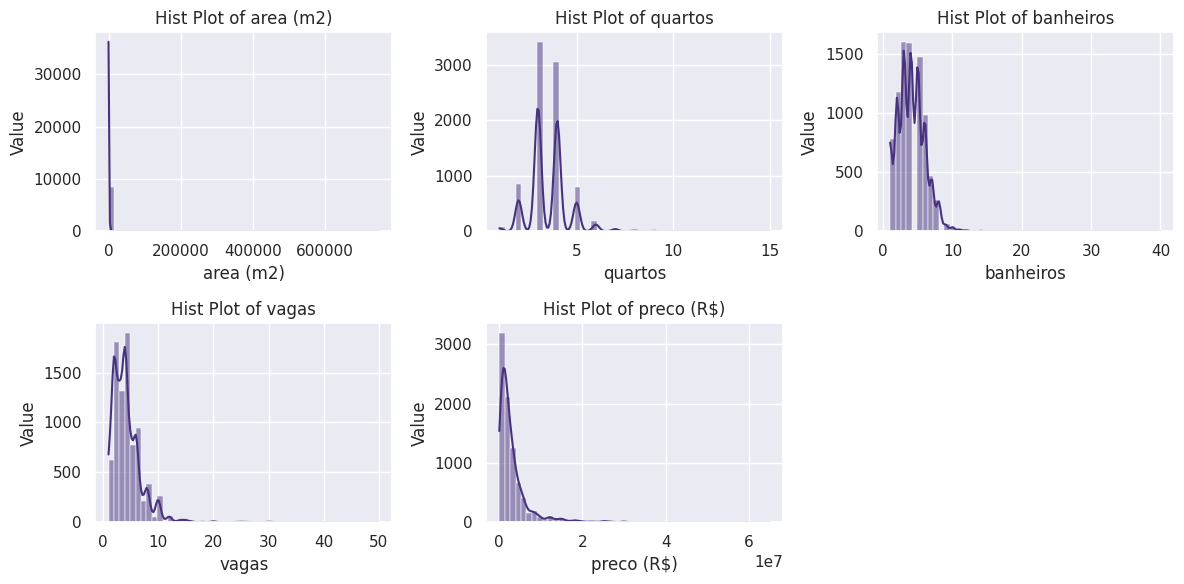

In [106]:
criacao_graficos(df=df_filtrado, colunas_x=numericos, col_y=df_filtrado['preco (R$)'], tipo_grafico='hist')

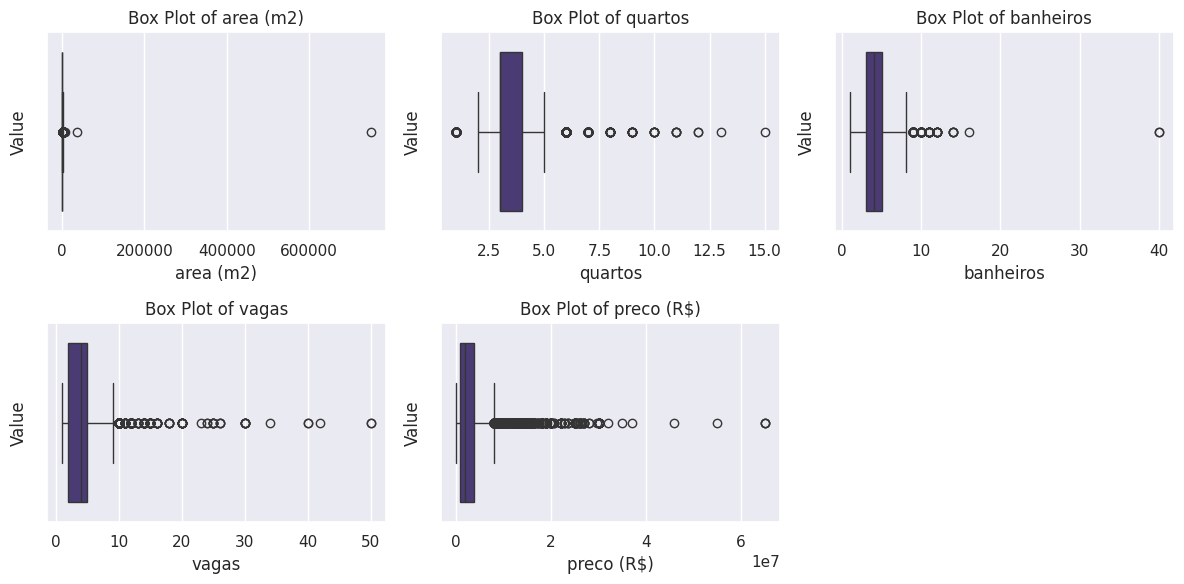

In [107]:
criacao_graficos(df=df_filtrado, colunas_x=numericos, col_y=df_filtrado['preco (R$)'], tipo_grafico='box')

Conseguimos perceber de maneira visual que muitos deles tem uma grande concentração em apenas uma parte, enquanto a outra não possui quase nada de dados.



###**Remoção de outliers**

Por esse motivo iremos aplicar a técnica IQR (Interquartile Range) para remover os outliers e deixar os dados mais limpos, com isso, no momento da criação do modelo ele não irá influenciar negativamente prevenindo overfitting.

In [108]:
def remover_outliers(df, colunas):
  for coluna in colunas:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    df = df[(df[coluna] >= lim_inf) & (df[coluna] <= lim_sup)]
    return df

In [120]:
df_sem_outliers = remover_outliers(df_filtrado, numericos)
df_sem_outliers.head()

,rua,bairro/cidade,area (m2),quartos,banheiros,vagas,preco (R$)
1,Rua Aurelia Perez Alvarez,"Jardim dos Estados, São Paulo",496,4,4,4,3700000.0
2,Jardim Morumbi São Paulo,São Paulo,310,3,2,4,685000.0
3,Rua Tobias Barreto,"Mooca, São Paulo",100,3,2,2,540000.0
4,Rua Graham Bell,"Santo Amaro, São Paulo",440,4,4,6,1980000.0
5,Rua Vigário João Álvares,"Vila Monumento, São Paulo",261,4,4,3,700000.0


###**Análise da estatística descritiva após remoção de outliers**

In [110]:
df_sem_outliers.describe()

,area (m2),quartos,banheiros,vagas,preco (R$)
count,8187.000000,8187.000000,8187.000000,8187.000000,8.187000e+03
mean,350.947478,3.510566,3.948577,4.059362,2.842132e+06
std,204.020434,1.015987,1.930738,2.523652,3.398980e+06
min,35.000000,1.000000,1.000000,1.000000,2.100000e+03
25%,184.000000,3.000000,3.000000,2.000000,8.900000e+05
50%,300.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,467.000000,4.000000,5.000000,5.000000,3.500000e+06
max,952.000000,15.000000,40.000000,50.000000,4.582500e+07


- A média da área é de aproximadamente 350 m² com um desvio padrão de 204, indicando que há áreas consideravelmente menores e maiores, o que apresenta uma variedade de opções de imóveis.

- A média e a mediana da quantidade de quartos são em torno de 3, mostrando um certa preferencia por imóveis de tamanho médio.

- A média dos valores dos imóveis estão torno de R\$ 2.842.132 indicando que há imóveis considerados de luxo que estão subindo a média geral.

- 25% dos imóveis possuem um valor mais acessível indicando ser até R\$ 890.000, o restante dos imóveis estão em uma faixa de valor não acessível a boa parcela da população brasileira.

- Para o financiamento de uma casa de R\$ 1.000.000 no Brazil é preciso ganhar em torno de R\$30.000 mensais e esse valor somente 1% da população Brasileira recebe.

###**Observar a distribuição das colunas numéricas após a retirada dos outliers**

Podemos fazer novamente a visualização da dispersão dos nossos dados com a finalizadade de comparar a melhora da visualização e sua qualidade.

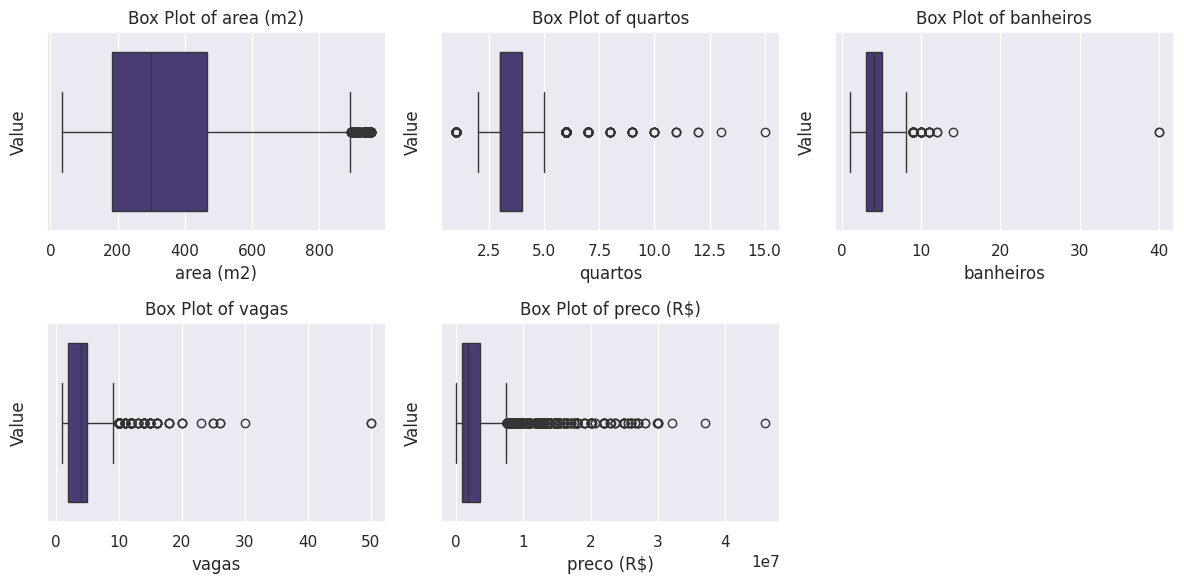

In [111]:
criacao_graficos(df=df_sem_outliers, colunas_x=numericos, col_y=df_filtrado['preco (R$)'], tipo_grafico='box')

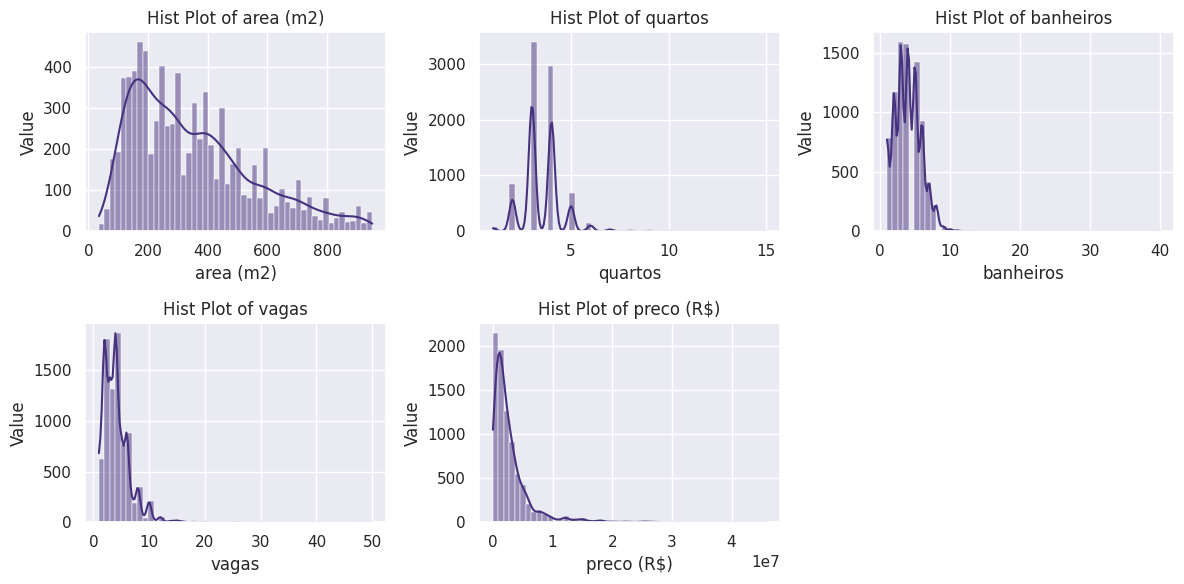

In [112]:
criacao_graficos(df=df_sem_outliers, colunas_x=numericos, col_y=df_filtrado['preco (R$)'], tipo_grafico='hist')

É possível ver que agora conseguimos compreender como esta a distribuição. Todos eles tem uma assimetria para o lado esquerdo, apresentando uma tendencia aos valores menores.

- Na área conseguimos visualizar que boa parte dos dados estão concentrados entre 0 e 400 m², com isso percebemos que boa parte são residencias com áreas menores não tendo muitas residencias especiais como mansões.
- A maioria de quartos são entre 2 a 5, o que significa que boa parte dos imóveis são para familias de tamanho médio.
- A maioria das casas estão em uma faixa de preço de até 1 milhão mostrando que uma boa quantidade não é necessáriamente propriedade de luxo, podendo estar situadas em locais menos desejados.

###**Iremos fazer uma análise multivariada dos dados**

Iremos fazer uma visualização do valor médio dos imóveis em relação a cidade/bairro.

<ipython-input-119-796c9a5076ab>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='preco (R$)', y='bairro/cidade', data=df_preco_medio_por_cidade, ci=None)


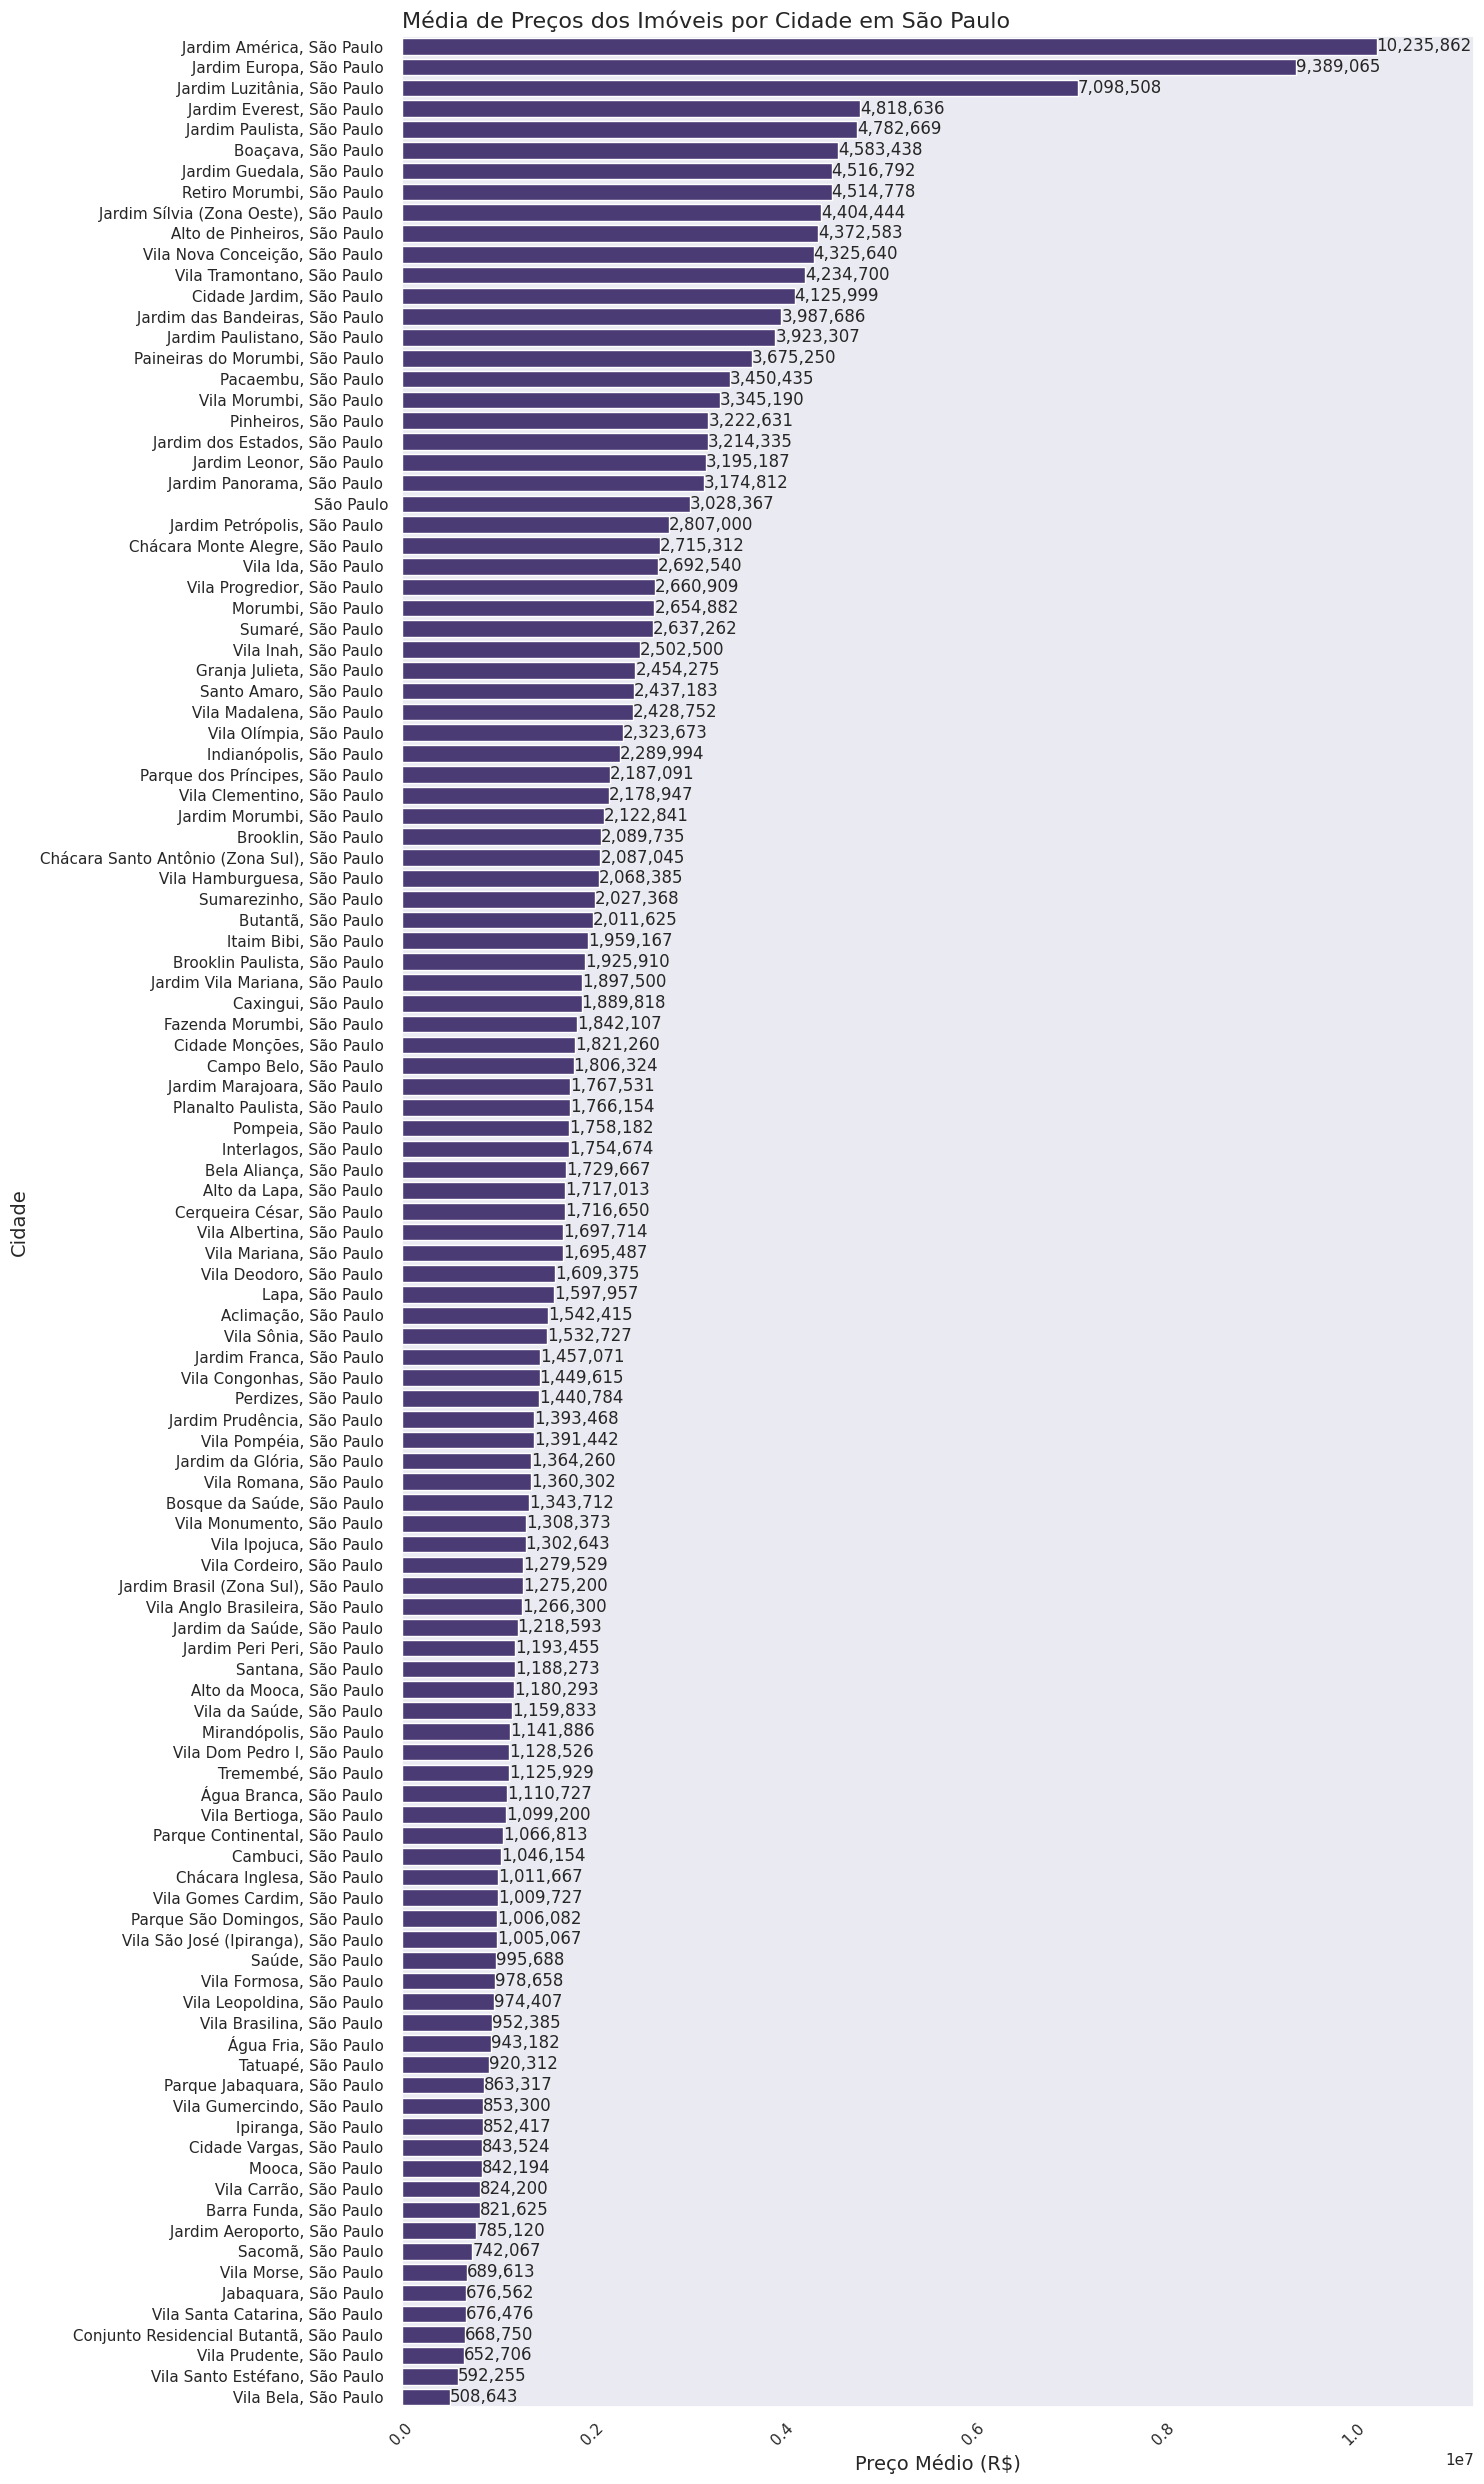

In [119]:
df_preco_medio_por_cidade = df_sem_outliers.groupby('bairro/cidade')['preco (R$)'].mean().reset_index()
df_preco_medio_por_cidade.sort_values('preco (R$)', inplace=True, ascending=False)

plt.figure(figsize=(15, 25))
sns.set_palette("viridis")

sns.barplot(x='preco (R$)', y='bairro/cidade', data=df_preco_medio_por_cidade, ci=None)

plt.title('Média de Preços dos Imóveis por Cidade em São Paulo', fontsize=16, loc='left')
plt.xlabel('Preço Médio (R$)', fontsize=14)
plt.ylabel('Cidade', fontsize=14)

plt.xticks(rotation=45)

for index, value in enumerate(df_preco_medio_por_cidade['preco (R$)']):
    plt.text(value, index, f'{value:,.0f}', va='center')

plt.grid(axis='x')
plt.xlim(0, df_preco_medio_por_cidade['preco (R$)'].max() * 1.1)
plt.tight_layout()
plt.show()

- Podemos perceber que há uma grande variáção do preço levando em consideração as diferentes cidades/bairros nos dados. Isso é interessante para compreendermos quais são os locais que possuem os imóveis mais caros, o que influencia no momento da compra.

Iremos fazer a visualização de um gráfico para fazer a correlação das variáveis. No momento será feita a partir do mapa de calor para mostrar a direção e a força de relação.

In [114]:
df_sem_outliers.head()

,rua,bairro/cidade,area (m2),quartos,banheiros,vagas,preco (R$)
1,Rua Aurelia Perez Alvarez,"Jardim dos Estados, São Paulo",496,4,4,4,3700000.0
2,Jardim Morumbi São Paulo,São Paulo,310,3,2,4,685000.0
3,Rua Tobias Barreto,"Mooca, São Paulo",100,3,2,2,540000.0
4,Rua Graham Bell,"Santo Amaro, São Paulo",440,4,4,6,1980000.0
5,Rua Vigário João Álvares,"Vila Monumento, São Paulo",261,4,4,3,700000.0


In [115]:
correlacao = df_sem_outliers.corr(numeric_only=True, method='pearson')

print(correlacao)

            area (m2)   quartos  banheiros     vagas  preco (R$)
area (m2)    1.000000  0.506388   0.566845  0.589608    0.560597
quartos      0.506388  1.000000   0.477213  0.370618    0.250120
banheiros    0.566845  0.477213   1.000000  0.409313    0.338251
vagas        0.589608  0.370618   0.409313  1.000000    0.333645
preco (R$)   0.560597  0.250120   0.338251  0.333645    1.000000


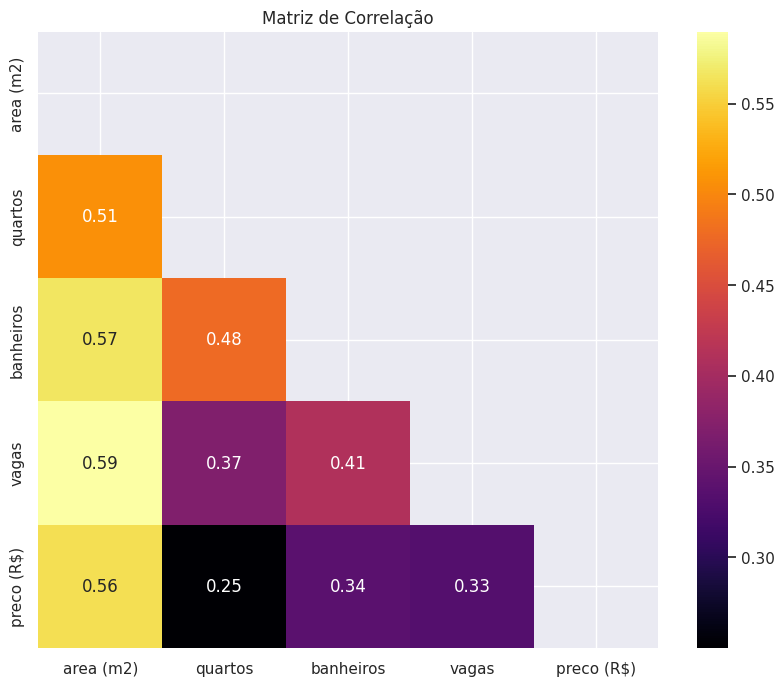

In [116]:
mask = np.triu(np.ones_like(correlacao, dtype=bool))

sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, mask=mask, annot=True, cmap='inferno', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

- Podemos visualizar que a área é a variável que mais tem influencia nas outras, sendo assim, o preço tem grande influencia dela.
- O número de quartos e banheiros tem relação positiva com o preço mas menos que a área.

Importante que todos eles tem relações positivas entre si, ou seja, são diretamente proporcionais.

###**Conclusões**


- Foi possivel observar que nos dados haviam alguns outliers que atrapalhavam a visualização da distribuição e possivelmente reduziriam a precisão do modelo machine learning.

- Boa parte dos dados são concentrados nos menores valores o que indicam que os imóveis são de pequeno a médio porte, sendo raro os de tamanho grande.

- A média da área é de aproximadamente 350 m² com um desvio padrão de 204, indicando que há áreas consideravelmente menores e maiores, o que apresenta uma variedade de opções de imóveis.

- A média e a mediana da quantidade de quartos são em torno de 3, mostrando um certa preferencia por imóveis de tamanho médio.

- A média dos valores dos imóveis estão torno de R\$ 2.842.132 indicando que há imóveis considerados de luxo que estão subindo a média geral.

- 25% dos imóveis possuem um valor mais acessível indicando ser até R\$ 890.000, o restante dos imóveis estão em uma faixa de valor não acessível a boa parcela da população brasileira.

- Para o financiamento de uma casa de R\$ 1.000.000 no Brazil é preciso ganhar em torno de R\$30.000 mensais e esse valor somente 1% da população Brasileira recebe.

- Podemos perceber que há uma grande variáção do preço levando em consideração as diferentes cidades/bairros nos dados. Isso é interessante para compreendermos quais são os locais que possuem os imóveis mais caros, o que influencia no momento da compra.




------


Necessário resumir os objetivos da análise. Um exemplo é entender as características dos imóveis, identificar padrões e afins.

Apresentar as relações significativas, um exemplo é a forte relação do preço com a área.

Comentar sobre a distribuição das variáveis, por exemplo que a maioria dos imóveis tem mais que um certo tanto ou a concentração de tal variável é com poucos quartos.

Identificar os outliers e discutir seus impactos.

Discutir como essas descobertas podem influenciar nas decisões de negócio.

Reconhecer as limitações dos dados ou na análise